In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow
!pip install opencv-python-headless


In [3]:
import os
import cv2
import tensorflow as tf

from tensorflow import keras
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#   definition of the path
input_folder = '/content/drive/MyDrive/yolo/obj_train_data'  #  input folder path
output_folder = os.path.join(input_folder, 'new_output')

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


In [5]:
#  definition of the path
input_folder = '/content/drive/MyDrive/yolo/obj_train_data'  #  input folder path
output_folder = os.path.join(input_folder, 'new_output')
obj_names_path = '/content/drive/MyDrive/yolo/obj.names'  #  To your obj_names file path


In [6]:
# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


In [7]:
# Function to read class labels from obj_names file
def read_class_labels(obj_names_path):
    with open(obj_names_path, 'r') as file:
        class_labels = file.read().splitlines()
    # Exchange class labels to meet the requirement
    class_labels[0], class_labels[1] = class_labels[1], class_labels[0]
    return class_labels


In [8]:
# Function to draw bounding boxes and labels on the image
def draw_bounding_boxes(image_path, annotation_path, class_labels):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
            class_id = int(class_id)
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))
            x_max = int(x_center + (box_width / 2))
            y_max = int(y_center + (box_width / 2))


            # Drawing  the rectangle on the image
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
 # Put class label text on the image
            label = class_labels[class_id]
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image

In [9]:
# Reading class labels from obj_names file
class_labels = read_class_labels(obj_names_path)


In [10]:
# Process each image and its corresponding annotation
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            annotated_image = draw_bounding_boxes(image_path, annotation_path, class_labels)
            output_path = os.path.join(output_folder, filename)




            cv2.imwrite(output_path, annotated_image)
            print(f'Saved annotated image: {output_path}')

print('Processing complete.')

Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001749.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001697.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001885.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001793.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001872.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001813.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001745.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001844.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001748.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train_data/new_output/frame_001971.PNG
Saved annotated image: /content/drive/MyDrive/yolo/obj_train

In [11]:
# Create separate folders for each class if they don't exist
saloon_cars_folder = os.path.join(output_folder, 'saloon_cars')
motorcycles_folder = os.path.join(output_folder, 'motorcycles')

if not os.path.exists(saloon_cars_folder):
    os.makedirs(saloon_cars_folder)

if not os.path.exists(motorcycles_folder):
    os.makedirs(motorcycles_folder)

In [12]:
# Function to crop and save image patches
def crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, count):
    cropped_image = image[y_min:y_max, x_min:x_max]
    if class_id == 0:
        output_path = os.path.join(saloon_cars_folder, f'saloon_cars_{count}_{filename}')
    elif class_id == 1:
        output_path = os.path.join(motorcycles_folder, f'motorcycles_{count}_{filename}')
    cv2.imwrite(output_path, cropped_image)
    print(f'Saved cropped image: {output_path}')

# to analyse counters
saloon_cars_count = 0
motorcycles_count = 0


In [13]:
# Process each image and its corresponding annotation to crop and save patches
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            image = cv2.imread(image_path)
            height, width, _ = image.shape

            with open(annotation_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
                    class_id = int(class_id)
                    x_center *= width
                    y_center *= height
                    box_width *= width
                    box_height *= height

                    x_min = int(x_center - (box_width / 2))
                    y_min = int(y_center - (box_height / 2))
                    x_max = int(x_center + (box_width / 2))
                    y_max = int(y_center + (box_width / 2))

                    # Crop and save the image patch
                    if class_id == 0:
                        saloon_cars_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, saloon_cars_count)
                    elif class_id == 1:
                        motorcycles_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, motorcycles_count)

print('Cropping and saving complete.')

Streaming output truncated to the last 5000 lines.
Saved cropped image: /content/drive/MyDrive/yolo/obj_train_data/new_output/saloon_cars/saloon_cars_977_frame_001400.PNG
Saved cropped image: /content/drive/MyDrive/yolo/obj_train_data/new_output/motorcycles/motorcycles_1069_frame_001400.PNG
Saved cropped image: /content/drive/MyDrive/yolo/obj_train_data/new_output/saloon_cars/saloon_cars_978_frame_001501.PNG
Saved cropped image: /content/drive/MyDrive/yolo/obj_train_data/new_output/motorcycles/motorcycles_1070_frame_001501.PNG
Saved cropped image: /content/drive/MyDrive/yolo/obj_train_data/new_output/motorcycles/motorcycles_1071_frame_001501.PNG
Saved cropped image: /content/drive/MyDrive/yolo/obj_train_data/new_output/motorcycles/motorcycles_1072_frame_001767.PNG
Saved cropped image: /content/drive/MyDrive/yolo/obj_train_data/new_output/saloon_cars/saloon_cars_979_frame_001928.PNG
Saved cropped image: /content/drive/MyDrive/yolo/obj_train_data/new_output/motorcycles/motorcycles_1073_f

In [14]:
# loading the Dataset 
import tensorflow as tf
dataset_new = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/yolo/obj_train_data/new_output/combineddataset',batch_size = 32,image_size = (224,224))

Found 7043 files belonging to 2 classes.


In [15]:
#scaling the data

data_scaled =dataset_new.map(lambda x,y: (x/255,y))


In [16]:
#view scale ranges
data_scaled.as_numpy_iterator().next()[0]

array([[[[0.8156863 , 0.8627451 , 0.8352941 ],
         [0.8156863 , 0.8627451 , 0.8352941 ],
         [0.8156863 , 0.8627451 , 0.8352941 ],
         ...,
         [0.7176471 , 0.6666667 , 0.58431375],
         [0.7176471 , 0.6666667 , 0.58431375],
         [0.7176471 , 0.6666667 , 0.58431375]],

        [[0.8156863 , 0.8627451 , 0.8352941 ],
         [0.8156863 , 0.8627451 , 0.8352941 ],
         [0.8156863 , 0.8627451 , 0.8352941 ],
         ...,
         [0.7176471 , 0.6666667 , 0.58431375],
         [0.7176471 , 0.6666667 , 0.58431375],
         [0.7176471 , 0.6666667 , 0.58431375]],

        [[0.8156863 , 0.8627451 , 0.8352941 ],
         [0.8156863 , 0.8627451 , 0.8352941 ],
         [0.8156863 , 0.8627451 , 0.8352941 ],
         ...,
         [0.7176471 , 0.6666667 , 0.58431375],
         [0.7176471 , 0.6666667 , 0.58431375],
         [0.7176471 , 0.6666667 , 0.58431375]],

        ...,

        [[0.69803923, 0.61960787, 0.5411765 ],
         [0.69803923, 0.61960787, 0.5411765 ]

In [17]:
data_scaled.as_numpy_iterator().next()[0].min()

0.09889706

In [18]:
#splitting the dataset 
#into Training and testing

train_size = int(0.8 * len(data_scaled))
test_size = int(0.2 * len(data_scaled))
train_dataset = data_scaled.take(train_size) # Extract training dataset
test_dataset = data_scaled.skip(train_size).take(test_size) # Extract test dataset




**IMPLEMENTINT THE FIRST CNN MODELS STARTS HERE**

In [19]:

# cnn model building starts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, kernel_size=(3, 3),  activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [20]:
#Model compilation
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [21]:
#training  the model

hist3 = model.fit(train_dataset, validation_data=test_dataset, epochs=2, batch_size=32)

Epoch 1/2
176/176 [==============================] - 557s 3s/step - loss: 0.2674 - accuracy: 0.8981 - val_loss: 0.1976 - val_accuracy: 0.9247
Epoch 2/2
176/176 [==============================] - 307s 2s/step - loss: 0.1018 - accuracy: 0.9670 - val_loss: 0.0927 - val_accuracy: 0.9695


In [ ]:
# Model Evaluation 
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
Pre = Precision()
Rec = Recall()
Acc=BinaryAccuracy()

In [ ]:
for batch in test_dataset.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    Pre.update_state(y,y_pred)
    Rec.update_state(y,y_pred)
    Acc.update_state(y,y_pred)
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()}')

1/1 [==============================] - 1s 808ms/step
Precision:0.6666666865348816,Recall:1.0,Accuracy:0.875
1/1 [==============================] - 0s 387ms/step
Precision:0.8095238208770752,Recall:1.0,Accuracy:0.9375
1/1 [==============================] - 0s 357ms/step
Precision:0.7428571581840515,Recall:1.0,Accuracy:0.90625
1/1 [==============================] - 0s 343ms/step
Precision:0.782608687877655,Recall:1.0,Accuracy:0.921875
1/1 [==============================] - 0s 342ms/step
Precision:0.7543859481811523,Recall:1.0,Accuracy:0.9125000238418579
1/1 [==============================] - 0s 357ms/step
Precision:0.7857142686843872,Recall:1.0,Accuracy:0.921875
1/1 [==============================] - 0s 345ms/step
Precision:0.800000011920929,Recall:1.0,Accuracy:0.9241071343421936
1/1 [==============================] - 0s 331ms/step
Precision:0.7961165308952332,Recall:1.0,Accuracy:0.91796875
1/1 [==============================] - 0s 347ms/step
Precision:0.7894737124443054,Recall:1.0,Accur

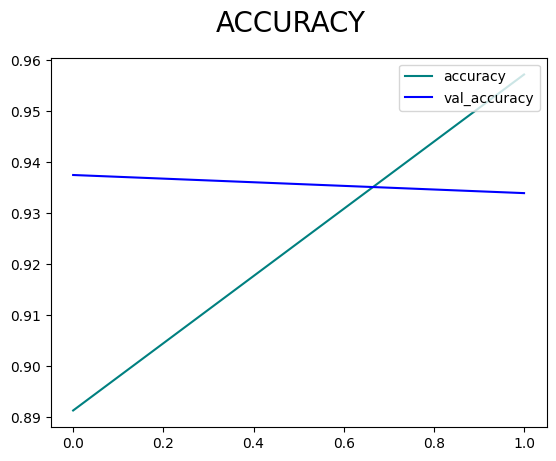

In [ ]:
#  performance of the model visually
fig = plt.figure()
plt.plot(hist3.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist3.history['val_accuracy'],color = 'blue',label = 'val_accuracy')
fig.suptitle('ACCURACY',fontsize=20)
plt.legend(loc='upper right')
plt.show()

 **Resnet**

In [ ]:
# A RESNET CNN
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf


In [ ]:
# Function to create a residual block
def residual_block(x, filters, kernel_size=3, stride=1, activation='relu'):
    y = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation(activation)(y)

    y = Conv2D(filters, kernel_size, strides=1, padding='same')(y)
    y = BatchNormalization()(y)

    if stride != 1 or x.shape[-1] != filters:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)

    out = Add()([x, y])

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, concatenate
from tensorflow.keras.models import Model


In [ ]:
# Function to create an inception module
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output

In [ ]:
# Define the input layer
input_layer = Input(shape=(224, 224, 3))


In [ ]:
# Initial layers before Inception modules
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)


In [ ]:
# Add inception modules
x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
x = inception_module(x, 112, 144, 288, 32, 64, 64)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)


In [ ]:
# Final layers
x = AveragePooling2D((7, 7), strides=(1, 1))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(1, activation='sigmoid')(x)


In [ ]:
# Create the model
model2 = Model(inputs=input_layer, outputs=output_layer)


In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Print the model summary
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_60 (Conv2D)          (None, 112, 112, 64)         9472      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_16 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_60[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_61 (Conv2D)          (None, 56, 56, 64)           4160      ['max_pooling2d_16[0][0]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model3.fit(train_dataset, epochs=2, validation_data=test_dataset, callbacks=[checkpoint, early_stopping])














Epoch 1/2
176/176 [==============================] - ETA: 0s - loss: 0.5850 - accuracy: 0.6960

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


176/176 [==============================] - 1565s 9s/step - loss: 0.5850 - accuracy: 0.6960 - val_loss: 0.3277 - val_accuracy: 0.8665
Epoch 2/2
176/176 [==============================] - 1519s 9s/step - loss: 0.2356 - accuracy: 0.9144 - val_loss: 0.1628 - val_accuracy: 0.9439


In [ ]:
#Evaluate the Model

from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
Pre = Precision()
Rec = Recall()
Acc=BinaryAccuracy()

In [ ]:
for batch in test_dataset.as_numpy_iterator():
    X, y = batch
    y_pred = model3.predict(X)
    Pre.update_state(y,y_pred)
    Rec.update_state(y,y_pred)
    Acc.update_state(y,y_pred)
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()}')

1/1 [==============================] - 3s 3s/step
Precision:0.8426294922828674,Recall:0.9769052863121033,Accuracy:0.9381944537162781
1/1 [==============================] - 3s 3s/step
Precision:0.8450980186462402,Recall:0.9729119539260864,Accuracy:0.9381793737411499
1/1 [==============================] - 2s 2s/step
Precision:0.8477842211723328,Recall:0.9691630005836487,Accuracy:0.9381648898124695
1/1 [==============================] - 2s 2s/step
Precision:0.8495237827301025,Recall:0.9674620628356934,Accuracy:0.9388020634651184
1/1 [==============================] - 2s 2s/step
Precision:0.8499062061309814,Recall:0.9679487347602844,Accuracy:0.9394132494926453
1/1 [==============================] - 2s 2s/step
Precision:0.8526703715324402,Recall:0.9645833373069763,Accuracy:0.9393749833106995
1/1 [==============================] - 3s 3s/step
Precision:0.8545454740524292,Recall:0.9611452221870422,Accuracy:0.939338207244873
1/1 [==============================] - 3s 3s/step
Precision:0.85739749

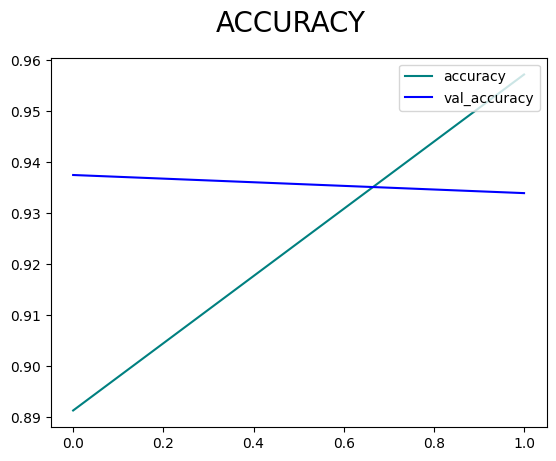

In [ ]:
# plot performance
fig = plt.figure()
plt.plot(hist3.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist3.history['val_accuracy'],color = 'blue',label = 'val_accuracy')
fig.suptitle('ACCURACY',fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [23]:
# BUILDING A GOOGLENET CONVOLUTIONAL NEURAL NETWORK
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, concatenate
from tensorflow.keras.models import Model

# Function to create an inception module
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Initial layers before Inception modules
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Add inception modules
x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
x = inception_module(x, 112, 144, 288, 32, 64, 64)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)

# Final layers
x = AveragePooling2D((7, 7), strides=(1, 1))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the model
googlenetmodel = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
googlenetmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
googlenetmodel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 56, 56, 64)           4160      ['max_pooling2d_3[0][0]'] 

In [24]:

# Define number of epochs and batch size
epochs = 2
batch_size = 32

# Train the model
history = googlenetmodel.fit(train_dataset,
                             epochs=epochs,
                             batch_size=batch_size,
                             validation_data=test_dataset)



Epoch 1/2
176/176 [==============================] - 1763s 10s/step - loss: 0.6560 - accuracy: 0.6955 - val_loss: 0.6169 - val_accuracy: 0.6733
Epoch 2/2
176/176 [==============================] - ETA: 0s - loss: 0.4820 - accuracy: 0.7635

In [25]:
# Evaluate the model
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

Pre = Precision()
Rec = Recall()
Acc=BinaryAccuracy()
for batch in test_dataset.as_numpy_iterator():
    X, y = batch
    y_pred = googlenetmodel.predict(X)
    Pre.update_state(y,y_pred)
    Rec.update_state(y,y_pred)
    Acc.update_state(y,y_pred)
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()}')

1/1 [==============================] - 3s 3s/step
Precision:1.0,Recall:0.8181818127632141,Accuracy:0.9375
1/1 [==============================] - 2s 2s/step
Precision:0.9047619104385376,Recall:0.8260869383811951,Accuracy:0.90625
1/1 [==============================] - 3s 3s/step
Precision:0.8787878751754761,Recall:0.8055555820465088,Accuracy:0.8854166865348816
1/1 [==============================] - 3s 3s/step
Precision:0.8536585569381714,Recall:0.8139534592628479,Accuracy:0.890625
1/1 [==============================] - 2s 2s/step
Precision:0.8399999737739563,Recall:0.8235294222831726,Accuracy:0.893750011920929
1/1 [==============================] - 2s 2s/step
Precision:0.8500000238418579,Recall:0.8095238208770752,Accuracy:0.890625
1/1 [==============================] - 2s 2s/step
Precision:0.8732394576072693,Recall:0.8266666531562805,Accuracy:0.9017857313156128
1/1 [==============================] - 2s 2s/step
Precision:0.8765432238578796,Recall:0.8255813717842102,Accuracy:0.90234375
1/1

In [ ]:
# Building a yolo model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Reshape, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(448, 448, 3))  # YOLO typically uses 448x448 input size

# Initial layers
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(192, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(128, (1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(256, (1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(512, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# More convolutional layers
for _ in range(4):
    x = Conv2D(256, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(512, (1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(1024, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# More convolutional layers
for _ in range(2):
    x = Conv2D(512, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(1024, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(1024, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(1024, (3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(1024, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(1024, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Flatten()(x)
x = Dense(4096)(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dense(1470)(x)  # 7x7 grid cells, 2 boxes per cell, 20 classes (7*7*(2*5+20))

output_layer = Reshape((7, 7, 30))(x)  # 30 because 20 classes + 2*(x, y, w, h, confidence)

# Create the model
yolomodel = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
yolomodel.compile(optimizer='adam', loss='mse')

# Print the model summary
yolomodel.summary()





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 448, 448, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      9472      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 192)     110784

In [ ]:
# Example using TensorFlow's image resizing function:
def preprocess_image(image, label):
    image = tf.image.resize(image, (448, 448))
    return image, label

train_dataset = train_dataset.map(preprocess_image)



In [ ]:
# Add a check to see if the dataset is empty
for image, label in train_dataset.take(1):
    print("Dataset is not empty. Image shape:", image.shape)
    break
else:
    print("Warning: Dataset is empty. Check your data loading and preprocessing.")



Dataset is not empty. Image shape: (32, 448, 448, 3)
